<a href="https://colab.research.google.com/github/jwkanggist/EverybodyTensorflow2.0/blob/master/lab2_linefitting_tf2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LAB2 Line-fitting
목적: 가장 기본적인 머신러닝 연습문제인 line fitting 문제를 tf2.0을 가지고 풀어보자!

In [0]:
# preprocessor parts

from __future__ import absolute_import, division, print_function, unicode_literals

# Install TensorFlow
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

import tensorflow as tf
import numpy as np

from matplotlib import cm
from matplotlib import gridspec
import matplotlib.pyplot as plt

from datetime import datetime


In [0]:
# Data pipeline: generation of data set
total_size = 5000
training_size = 4000
validation_size = 1000
xsize = 20

x_data = np.zeros([xsize, total_size])
a_true = 2
b_true = 0.5

for i in range(total_size):
    x_data[:,i] =  np.linspace(0,10,xsize)

noise_var   = 1.0
noise       = np.sqrt(noise_var) * np.random.randn(xsize,total_size)
y_clean     = a_true * x_data + b_true
y_data      = y_clean + noise

x_train = x_data[:,0:training_size].transpose()
y_train = y_data[:,0:training_size].transpose()

x_test = x_data[:,training_size:-1].transpose()
y_test = y_data[:,training_size:-1].transpose()

In [0]:
# model building

model = tf.keras.models.Sequential([
  tf.keras.layers.Dense(xsize, activation='linear'),
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['accuracy'])

In [13]:
# model training and evaluation part
training_epochs = 20
model.fit(x_train, y_train, epochs=training_epochs)
model.evaluate(x_test,  y_test, verbose=2)

Train on 4000 samples
Epoch 1/20
4000/4000 [==============================] - 0s 85us/sample - loss: 81.8486 - accuracy: 0.0000e+00
Epoch 2/20
4000/4000 [==============================] - 0s 42us/sample - loss: 11.8879 - accuracy: 0.0000e+00
Epoch 3/20
4000/4000 [==============================] - 0s 42us/sample - loss: 1.2676 - accuracy: 0.9520
Epoch 4/20
4000/4000 [==============================] - 0s 46us/sample - loss: 0.0954 - accuracy: 1.0000
Epoch 5/20
4000/4000 [==============================] - 0s 44us/sample - loss: 0.0048 - accuracy: 1.0000
Epoch 6/20
4000/4000 [==============================] - 0s 39us/sample - loss: 1.5576e-04 - accuracy: 1.0000
Epoch 7/20
4000/4000 [==============================] - 0s 41us/sample - loss: 3.0343e-06 - accuracy: 1.0000
Epoch 8/20
4000/4000 [==============================] - 0s 39us/sample - loss: 3.4059e-08 - accuracy: 1.0000
Epoch 9/20
4000/4000 [==============================] - 0s 41us/sample - loss: 2.6046e-10 - accuracy: 1.0000
Epoch 1

[5.363569662024396e-13, 1.0]

Text(0, 0.5, 'Y data')

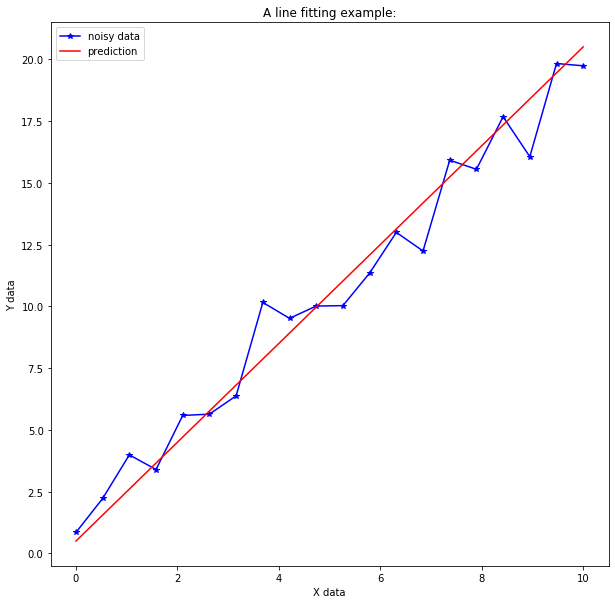

In [24]:
# prediction 

plt.figure(1,figsize=(10,10))
test_input = x_test[0,:]
test_output = y_test[0,:]
pred_y = model.predict(test_input.reshape([1,20]))
plt.plot(test_input,test_output,label='noisy data',color='b',marker='*')
plt.plot(test_input, pred_y.reshape([xsize,]),label='prediction',color='r')
plt.legend()
plt.title('A line fitting example:')
plt.xlabel('X data')
plt.ylabel('Y data')